In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
martabase = pd.read_csv("martabase_final.csv")

In [26]:
martabase

,ID,Station,Latitude,Longitude,Color
0,1,Airport,33.640758,-84.446341,NaN
1,2,Arts Center,33.789705,-84.387789,NaN
2,3,Ashby,33.756346,-84.417556,NaN
3,4,Avondale,33.775277,-84.281903,NaN
4,5,Bankhead,33.771890,-84.428840,NaN
...,...,...,...,...,...
155,156,Standing Peachtree Park,33.830141,-84.445858,NaN
156,157,Kennedy Memorial Gardens,33.677714,-84.289007,NaN
157,158,Chapel Hill Park,33.673422,-84.225972,NaN
158,159,Collins Hill Park,34.017629,-84.014661,NaN


In [27]:
martabase.shape

(160, 5)

In [28]:
import folium

mapmarta=folium.Map(location=[33.934150, -84.246706])

for ind in range(len(martabase["Station"])):
    name = martabase.iloc[ind,1]
    lat = martabase.iloc[ind,2]
    longi = martabase.iloc[ind,3]
    folium.Marker([lat,longi],tooltip=name, icon=folium.Icon(color='black',icon_color='red')).add_to(mapmarta)
mapmarta

In [29]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def addEdge(self, v1, v2):
        self.graph[v1].append(v2)
        self.graph[v2].append(v1)

    def DepthFirst(self, v, visited_list):
        visited_list[v] = True
        for i in self.graph[v]:
            if visited_list[i] == False:
                self.DepthFirst(i, visited_list)
    
    def isConnected(self):
        visited_list = False*(self.V)
        for i in range(self.V):
            if(len(self.graph[i]) != 0):
                break
        if i == self.V-1:
            return True
       
        self.DepthFirst(i, visited_list)
 
        # Check if all non-zero degree vertices are visited
        for i in range(self.V):
            if visited_list[i] == False and len(self.graph[i]) > 0:
                return False
 
        return True
    
    def isEulerian(self):
        # Check if all non-zero degree vertices are connected
        if self.isConnected() == False:
            return 0
        else:
            # Count vertices with odd degree
            odd = 0
            for i in range(self.V):
                if len(self.graph[i]) % 2 != 0:
                    odd += 1
            #number of odds:
                # 0 -> euler cycle
                # 2 -> euler path 
                # >2 -> not eulerian 
            if odd == 0:
                return 2 #euler cycle
            elif odd == 2:
                return 1 #euler path
            elif odd > 2:
                return 0 #no euler
    
    def test(self):
        res = self.isEulerian()
        if res == 0:
            print("Graph is not Eulerian")
        elif res == 1:
            print("Graph has a Euler path")
        else:
            print("Graph has a Euler cycle")

In [30]:
g = Graph(160)
g.addEdge(1,2)

In [31]:
names = martabase.iloc[:,1]
latitudes = martabase.iloc[:,2]
longitudes = martabase.iloc[:,3]
longitudes

0     -84.446341
1     -84.387789
2     -84.417556
3     -84.281903
4     -84.428840
         ...    
155   -84.445858
156   -84.289007
157   -84.225972
158   -84.014661
159   -84.510412
Name: Longitude, Length: 160, dtype: float64

In [32]:
npnames = names.to_numpy()
nplats = latitudes.to_numpy()
nplongs = longitudes.to_numpy()

In [33]:
from sklearn.preprocessing import MinMaxScaler

nplats = nplats.reshape(-1, 1)
nplongs = nplongs.reshape(-1, 1)

lats_fin = MinMaxScaler().fit_transform(nplats)
longs_fin = MinMaxScaler().fit_transform(nplongs)

In [34]:
lats_fin

array([[0.06162806],
       [0.30460848],
       [0.25018923],
       [0.28107178],
       [0.27554649],
       [0.4204323 ],
       [0.4003752 ],
       [0.46349103],
       [0.26643556],
       [0.07943393],
       [0.28015824],
       [0.25010277],
       [0.48792659],
       [0.51911909],
       [0.26457749],
       [0.1220783 ],
       [0.25941436],
       [0.2460783 ],
       [0.23632137],
       [0.24071615],
       [0.24740294],
       [0.27212724],
       [0.25206688],
       [0.27680914],
       [0.23976998],
       [0.15901631],
       [0.39830995],
       [0.35728385],
       [0.50197227],
       [0.29060522],
       [0.27525612],
       [0.5572137 ],
       [0.1857553 ],
       [0.25562316],
       [0.53842577],
       [0.25104405],
       [0.21668842],
       [0.24495922],
       [0.76027732],
       [0.53130669],
       [0.84556281],
       [0.61658564],
       [0.68632137],
       [0.74995269],
       [0.69017945],
       [0.87550408],
       [0.79616313],
       [0.787

In [35]:
longs_fin

array([[0.37190522],
       [0.43971533],
       [0.40524164],
       [0.5623438 ],
       [0.39217344],
       [0.49505715],
       [0.4637706 ],
       [0.53339433],
       [0.44038704],
       [0.36906551],
       [0.54649496],
       [0.4281689 ],
       [0.56409719],
       [0.48996491],
       [0.52671778],
       [0.37885045],
       [0.4955482 ],
       [0.43533533],
       [0.42972541],
       [0.44124984],
       [0.34689103],
       [0.62285198],
       [0.48024019],
       [0.59704796],
       [0.45401693],
       [0.39215144],
       [0.47617173],
       [0.46327377],
       [0.48037106],
       [0.44138766],
       [0.44097768],
       [0.47629217],
       [0.39638899],
       [0.43999444],
       [0.48114121],
       [0.42104532],
       [0.41056435],
       [0.37162843],
       [0.57233025],
       [0.61191124],
       [0.48954799],
       [0.70375578],
       [0.75921688],
       [0.81770299],
       [0.52248486],
       [0.89948348],
       [0.84313641],
       [0.731

In [36]:
longs = longs_fin.flatten()
lats = lats_fin.flatten()

In [37]:
vertices_finnn = pd.DataFrame({'Station': npnames, 'Latitude': lats, 'Longitude': longs})

martagraph = vertices_finnn.set_index('Station')[['Longitude', 'Latitude']].apply(tuple, axis=1).to_dict()
martagraph


{'Airport': (0.3719052196370427, 0.06162805872756394),
 'Arts Center': (0.4397153346381515, 0.3046084828711173),
 'Ashby': (0.40524164128457585, 0.25018923327895237),
 'Avondale': (0.5623437988580946, 0.28107177814029427),
 'Bankhead': (0.39217343972576657, 0.2755464926590534),
 'Brookhaven/Oglethorpe': (0.4950571531147574, 0.42043230016313515),
 'Buckhead': (0.463770600020851, 0.4003752039151678),
 'Chamblee': (0.5333943275388862, 0.4634910277324522),
 'Civic Center': (0.4403870429777612, 0.2664355628058743),
 'College Park': (0.36906551472547733, 0.07943393148450184),
 'Decatur': (0.5464949563968702, 0.2801582381729233),
 'GWCC/CNN Center': (0.42816889990388063, 0.2501027732463257),
 'Doraville': (0.5640971892480309, 0.4879265905383363),
 'Dunwoody': (0.489964909029851, 0.5191190864600301),
 'East Lake': (0.5267177782667716, 0.26457748776508794),
 'East Point': (0.37885045224501823, 0.12207830342576642),
 'Edgewood/Candler Park': (0.49554819507336845, 0.2594143556280528),
 'Five Poin

In [38]:
vertices_f = martabase.iloc[:,2:4]
vertices_f

,Latitude,Longitude
0,33.640758,-84.446341
1,33.789705,-84.387789
2,33.756346,-84.417556
3,33.775277,-84.281903
4,33.771890,-84.428840
...,...,...
155,33.830141,-84.445858
156,33.677714,-84.289007
157,33.673422,-84.225972
158,34.017629,-84.014661


In [39]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [40]:
vertices_final = vertices_f.to_numpy().tolist()
vertices_final

[[33.640758, -84.446341],
 [33.789705, -84.387789],
 [33.756346, -84.417556],
 [33.775277, -84.281903],
 [33.77189, -84.42884],
 [33.860705, -84.340003],
 [33.84841, -84.367018],
 [33.8871, -84.3069],
 [33.766305, -84.387209],
 [33.651673, -84.448793],
 [33.774717, -84.295588],
 [33.756293, -84.397759],
 [33.902079, -84.280389],
 [33.9212, -84.3444],
 [33.765166, -84.312665],
 [33.677814, -84.440344],
 [33.762001, -84.339579],
 [33.753826, -84.391571],
 [33.747845, -84.396415],
 [33.750539, -84.386464],
 [33.754638, -84.46794],
 [33.769794, -84.229656],
 [33.757497, -84.352797],
 [33.772664, -84.251937],
 [33.749959, -84.37544],
 [33.700457, -84.428859],
 [33.847144, -84.35631],
 [33.821995, -84.367447],
 [33.910689, -84.352684],
 [33.781121, -84.386345],
 [33.771712, -84.386699],
 [33.944552, -84.356206],
 [33.716848, -84.4252],
 [33.759677, -84.387548],
 [33.933035, -84.352019],
 [33.75687, -84.40391],
 [33.73581, -84.41296],
 [33.75314, -84.44658],
 [34.06903, -84.27328],
 [33.92867

[('Airport', 'College Park'), ('Airport', 'Hapeville'), ('Airport', 'East Point'), ('Airport', 'Forest Park'), ('Airport', 'Deerwood Park'), ('Airport', 'Lakewood/Fort McPherson'), ('Airport', 'Browns Mill Park'), ('Airport', 'Lake Charlotte Preserve'), ('Arts Center', 'Midtown'), ('Arts Center', 'North Avenue'), ('Arts Center', 'Civic Center'), ('Arts Center', 'Peachtree Center'), ('Arts Center', 'GWCC/CNN Center'), ('Arts Center', 'Bankhead'), ('Arts Center', 'Vine City'), ('Arts Center', 'Lindbergh Center'), ('Ashby', 'Vine City'), ('Ashby', 'GWCC/CNN Center'), ('Ashby', 'Garnett'), ('Ashby', 'Bankhead'), ('Ashby', 'Five Points'), ('Ashby', 'West End'), ('Ashby', 'West Lake'), ('Ashby', 'Peachtree Center'), ('Avondale', 'Decatur'), ('Avondale', 'Kensington'), ('Avondale', 'East Lake'), ('Avondale', 'Emory'), ('Avondale', 'North Druid Hills'), ('Avondale', 'Indian Creek'), ('Avondale', 'Clarkston'), ('Avondale', 'Edgewood/Candler Park'), ('Bankhead', 'Ashby'), ('Bankhead', 'West Lake

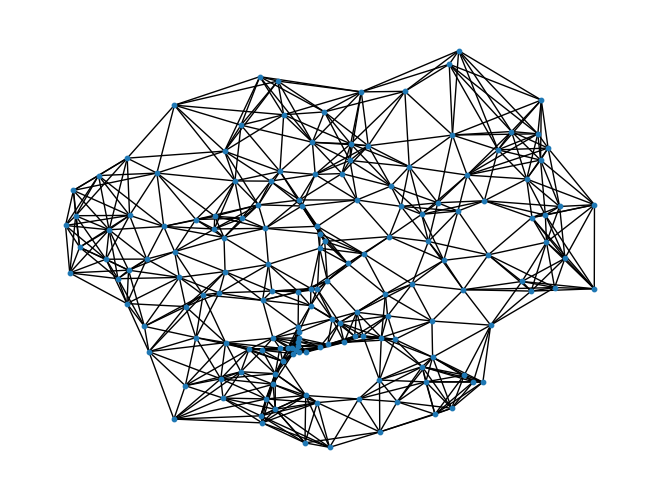

In [42]:
def distance_formula(x1, y1, x2, y2):
   dist = math.sqrt( (math.pow( (x1 - x2) ,2)) + (math.pow( (y1 - y2) ,2)) )
   return dist

def knn_edges(n, k, vertices):
    edges = []
    for key, v in vertices.items():
        # Values for x1,x2
        name = key
        y1 = v[0]
        x1 = v[1]

        # Calculate distances to other vertices
        distances = []
        for key2, u in vertices.items():
            if u[0]!=y1 and u[1]!=x1: 
                try:
                    distances.append((u, distance_formula(x1, y1, u[1], u[0])))
                except Exception as e:
                    print(f"Error calculating distance: {e}")
        
        # Sort distances
        distances.sort(key=lambda x: x[1])

        # Select k nearest neighbors and add edges
        for u, _ in distances[:k]:
            val = {i for i in martagraph if martagraph[i]==u}
            va = val.pop()
            edges.append((name, va))

    return edges

G = nx.Graph()

# Step 3: Add nodes and edges
for name, coordinates in martagraph.items():
    G.add_node(name, pos=coordinates)  # Add node with 'pos' attribute

edges = knn_edges(160, 8, martagraph)
print(edges)
G.add_edges_from(edges)

# Plot the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=10)
plt.show()

In [43]:


# Find Hamiltonian path
hamiltonian_path = list(nx.tournament.hamiltonian_path(G))

# Print the Hamiltonian path
print("Hamiltonian Path:", hamiltonian_path)

# Visualize the graph and the Hamiltonian path
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_nodes(G, pos, nodelist=hamiltonian_path, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=[(hamiltonian_path[i], hamiltonian_path[i + 1]) for i in range(len(hamiltonian_path) - 1)], edge_color='r', width=2)
plt.show()


NetworkXNotImplemented: not implemented for undirected type

In [44]:
eulerian_circuit = list(nx.eulerian_circuit(G))

# Print the Eulerian circuit
print("Eulerian Circuit:", eulerian_circuit)

# Visualize the graph and the Eulerian circuit
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=eulerian_circuit, edge_color='r', width=2)
plt.show()

NetworkXError: G is not Eulerian.

In [ ]:
start = input("Enter your starting location: ")
end = input("Enter your destination: ")
print(nx.dijkstra_path(G, start, end))

['Airport', 'East Point', 'Melvin Drive Park', 'Six Flags Over GA', 'Heritage Park', 'Bishop Park', 'Downtown Marietta', 'Sandy Plains', 'West Field', 'North Roswell', 'Avalon']


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b3686541-b591-45d5-90b4-564457237abf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>